<a href="https://colab.research.google.com/github/asim5800/Deep-learning-practicals/blob/main/RNN_model_darts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Time Series Made Easy in Python USing Darts Library

In [ ]:
!pip install darts

     |████████████████████████████████| 290 kB 5.3 MB/s 
     |████████████████████████████████| 65 kB 3.9 MB/s 
     |████████████████████████████████| 177 kB 39.4 MB/s 
     |████████████████████████████████| 1.4 MB 41.7 MB/s 
     |████████████████████████████████| 11.2 MB 28.1 MB/s 
     |████████████████████████████████| 791 kB 57.4 MB/s 
     |████████████████████████████████| 9.8 MB 23.2 MB/s 
     |████████████████████████████████| 155 kB 25.7 MB/s 
     |████████████████████████████████| 374 kB 55.5 MB/s 
     |████████████████████████████████| 49 kB 5.2 MB/s 
     |████████████████████████████████| 216 kB 65.2 MB/s 
  Created wheel for filterpy: filename=filterpy-1.4.5-py3-none-any.whl size=110474 sha256=aa5a7eddb6b219df872023111c2b1b20e5b6ee08fa443fd3ae00eab07d4e4f38
  Stored in directory: /root/.cache/pip/wheels/ce/e0/ee/a2b3c5caab3418c1ccd8c4de573d4cbe13315d7e8b0a55fbc2
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640407 sha256=7c737929cc02eb8

In [ ]:
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset

In [ ]:
AirPassengersDataset().load().pd_series()

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Freq: MS, Length: 144, dtype: float64

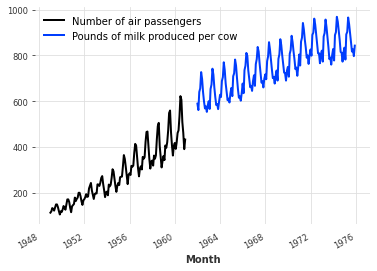

In [ ]:
import matplotlib.pyplot as plt
series_air = AirPassengersDataset().load()
series_milk = MonthlyMilkDataset().load()

series_air.plot(label='Number of air passengers')
series_milk.plot(label='Pounds of milk produced per cow')
plt.legend();

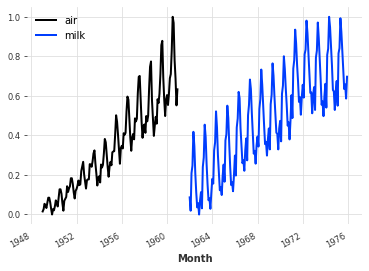

In [ ]:
from darts.dataprocessing.transformers import Scaler
scaler_air, scaler_milk = Scaler(), Scaler()
series_air_scaled = scaler_air.fit_transform(series_air)
series_milk_scaled = scaler_milk.fit_transform(series_milk)

series_air_scaled.plot(label='air')
series_milk_scaled.plot(label='milk')
plt.legend();

In [ ]:
# Train And Validation Split
train_air, val_air = series_air_scaled[:-36], series_air_scaled[-36:]
train_milk, val_milk = series_milk_scaled[:-36], series_milk_scaled[-36:]

In [ ]:
train_air


<TimeSeries (DataArray) (Month: 108, component: 1, sample: 1)>
array([[[0.01544402]],

       [[0.02702703]],

       [[0.05405405]],

       [[0.04826255]],

       [[0.03281853]],

       [[0.05984556]],

       [[0.08494208]],

       [[0.08494208]],

       [[0.06177606]],

       [[0.02895753]],

...

       [[0.48648649]],

       [[0.47104247]],

       [[0.48455598]],

       [[0.61389961]],

       [[0.6969112 ]],

       [[0.7007722 ]],

       [[0.57915058]],

       [[0.46911197]],

       [[0.38803089]],

       [[0.44787645]]])
Coordinates:
  * Month      (Month) datetime64[ns] 1949-01-01 1949-02-01 ... 1957-12-01
  * component  (component) object '#Passengers'
Dimensions without coordinates: sample

In [ ]:
from darts import TimeSeries
from darts.utils.timeseries_generation import gaussian_timeseries, linear_timeseries, sine_timeseries
from darts.models import RNNModel, TCNModel, TransformerModel, NBEATSModel, BlockRNNModel
from darts.metrics import mape, smape

In [ ]:
model_air_milk = RNNModel(input_chunk_length=24, output_chunk_length=12, n_epochs=250, random_state=0)

In [ ]:
model_air_milk.fit([train_air, train_milk], verbose=True)

[2021-11-30 10:14:48,210] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 216 samples.
[2021-11-30 10:14:48,210] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 216 samples.
[2021-11-30 10:14:48,220] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2021-11-30 10:14:48,220] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
  1%|          | 2/250 [00:00<00:17, 14.24it/s]

  5%|▍         | 12/250 [00:00<00:18, 13.10it/s]

  9%|▉         | 22/250 [00:01<00:17, 13.01it/s]

 13%|█▎        | 32/250 [00:02<00:16, 13.37it/s]

 17%|█▋        | 42/250 [00:03<00:15, 13.28it/s]

 21%|██        | 52/250 [00:03<00:15, 13.02it/s]

 25%|██▍       | 62/250 [00:04<00:14, 13.14it/s]

 29%|██▉       | 72/250 [00:05<00:13, 13.05it/s]

 33%|███▎      | 82/250 [00:06<00:13, 12.68it/s]

 37%|███▋      | 92/250 [00:07<00:12, 12.87it/s]

 41%|████      | 102/250 [00:07<00:12, 12.28it/s]

 45%|████▍     | 112/250 [00:08<00:11, 12.37it/s]

 49%|████▉     | 122/250 [00:09<00:09, 12.92it/s]

 53%|█████▎    | 132/250 [00:10<00:08, 13.13it/s]

 57%|█████▋    | 142/250 [00:10<00:08, 13.20it/s]

 61%|██████    | 152/250 [00:11<00:07, 13.25it/s]

 65%|██████▍   | 162/250 [00:12<00:06, 13.47it/s]

 69%|██████▉   | 172/250 [00:13<00:05, 13.39it/s]

 73%|███████▎  | 182/250 [00:13<00:05, 13.11it/s]

 77%|███████▋  | 192/250 [00:14<00:04, 13.15it/s]

 81%|████████  | 202/250 [00:15<00:03, 13.40it/s]

 85%|████████▍ | 212/250 [00:16<00:02, 13.50it/s]

 89%|████████▉ | 222/250 [00:17<00:02, 12.87it/s]

 93%|█████████▎| 232/250 [00:17<00:01, 13.36it/s]

 97%|█████████▋| 242/250 [00:18<00:00, 13.34it/s]

100%|██████████| 250/250 [00:19<00:00, 13.08it/s]


MAPE = 11.43%


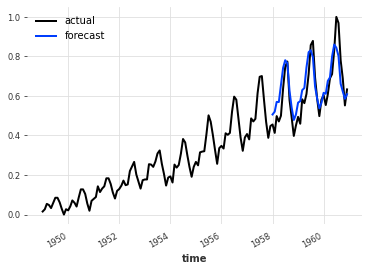

In [ ]:
pred = model_air_milk.predict(n=36, series=train_air)

series_air_scaled.plot(label='actual')
pred.plot(label='forecast')
plt.legend();
print('MAPE = {:.2f}%'.format(mape(series_air_scaled, pred)))

MAPE = 7.48%


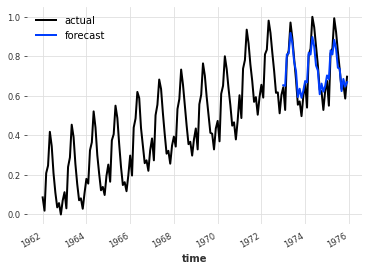

In [ ]:
pred = model_air_milk.predict(n=36, series=train_milk)

series_milk_scaled.plot(label='actual')
pred.plot(label='forecast')
plt.legend();
print('MAPE = {:.2f}%'.format(mape(series_milk_scaled, pred)))